In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns

In [2]:
df=pd.read_csv("Warehouse_and_Retail_Sales (1).csv")

In [3]:
df

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0
...,...,...,...,...,...,...,...,...,...
307640,2020,9,LEGENDS LTD,98507,SCHLENKERLA URBOCK 20/16.9,BEER,0.00,0.0,1.0
307641,2020,9,MILLER BREWING COMPANY,98540,PILSNER URQUELL 1/2K,KEGS,0.00,0.0,4.0
307642,2020,9,CONSTANTINE WINES INC,98930,ARIS GREEK LAGER 4/6NR - 11OZ,BEER,0.00,0.0,0.0
307643,2020,9,LEGENDS LTD,98949,SCHNEIDER WEISEN EDEL WEISS NR 20/CS - 16.9OZ,BEER,0.00,0.0,1.0


In [4]:
df.duplicated().any()

False

In [5]:
df.isnull().any()

YEAR                False
MONTH               False
SUPPLIER             True
ITEM CODE           False
ITEM DESCRIPTION    False
ITEM TYPE            True
RETAIL SALES         True
RETAIL TRANSFERS    False
WAREHOUSE SALES     False
dtype: bool

In [6]:
df[df['SUPPLIER'].isnull()]

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
107,2020,1,NaN,107,JIGGER MEASURE SHOT GLASS,STR_SUPPLIES,14.69,18.0,0.0
189,2020,1,NaN,113,BARTENDERS BLACK BOOK,STR_SUPPLIES,0.40,0.0,0.0
233,2020,1,NaN,115,PLASTIC SHOT GLASS PACK,STR_SUPPLIES,5.71,6.0,0.0
254,2020,1,NaN,117,WHISKEY TASTING JOURNAL,STR_SUPPLIES,0.08,0.0,0.0
263,2020,1,NaN,118,PLASTIC WINE GLASS PACK,STR_SUPPLIES,7.40,10.0,0.0
...,...,...,...,...,...,...,...,...,...
297976,2020,9,NaN,118,PLASTIC WINE GLASS PACK,STR_SUPPLIES,5.20,0.0,0.0
297997,2020,9,NaN,119,BRUMATE WINE TUMBLER,STR_SUPPLIES,2.00,0.0,0.0
298052,2020,9,NaN,123,HOLIDAY TOTE FOIL BAG,STR_SUPPLIES,0.25,0.0,0.0
298478,2020,9,NaN,WC,WINE CREDIT,REF,0.00,0.0,-70.0


In [7]:
df[df['ITEM TYPE'].isnull()]

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
95775,2017,10,REPUBLIC NATIONAL DISTRIBUTING CO,347939,FONTANAFREDDA BAROLO SILVER LABEL 750 ML,NaN,0.0,0.0,1.0


In [8]:
df[df['RETAIL SALES'].isnull()]

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
18402,2020,7,NaN,4,RMS ITEM,NON-ALCOHOL,NaN,0.0,0.0
297225,2020,9,NaN,3,COUPON,NON-ALCOHOL,NaN,0.0,0.0
303261,2020,9,NaN,4,RMS ITEM,NON-ALCOHOL,NaN,0.0,0.0


In [9]:
df['RETAIL SALES']=df['RETAIL SALES'].fillna(df['RETAIL SALES'].mean())

In [10]:
df[df['RETAIL SALES'].isnull()]

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES


In [11]:
df.corr(numeric_only=True)

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
YEAR,1.000000,-0.386043,0.004517,0.003713,0.006810
MONTH,-0.386043,1.000000,0.011548,0.009923,0.003487
RETAIL SALES,0.004517,0.011548,1.000000,0.960054,0.490472
RETAIL TRANSFERS,0.003713,0.009923,0.960054,1.000000,0.492093
WAREHOUSE SALES,0.006810,0.003487,0.490472,0.492093,1.000000


<Axes: >

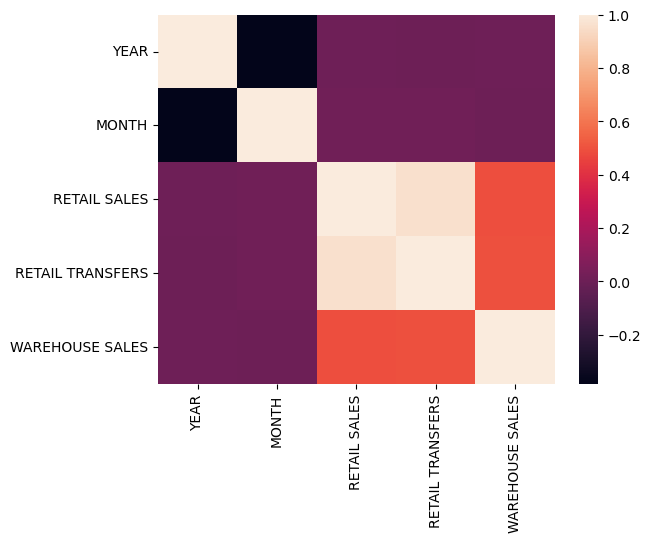

In [12]:
sns.heatmap(df.corr(numeric_only=True))

In [27]:
df.groupby('YEAR')[['RETAIL SALES','WAREHOUSE SALES','RETAIL TRANSFERS']].sum().sort_values(by='WAREHOUSE SALES', ascending=False)

,RETAIL SALES,WAREHOUSE SALES,RETAIL TRANSFERS
YEAR,,,
2019,960191.200000,3543371.23,957562.40
2017,686734.570000,2333849.13,676620.50
2020,360398.772214,1385009.73,346132.81
2018,153595.900000,519526.19,153652.92


In [ ]:
df_mean=df.groupby('YEAR')[['RETAIL SALES','RETAIL TRANSFERS','WAREHOUSE SALES']].mean().sort_values(by='WAREHOUSE SALES', ascending=False)

In [ ]:
df.groupby('ITEM TYPE')[['RETAIL SALES','RETAIL TRANSFERS','WAREHOUSE SALES']].mean().sort_values(by='WAREHOUSE SALES', ascending=False)

In [42]:
df_mean=df_mean.transpose()
df_mean

,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
YEAR,,,
2020,7.787691,7.479425,29.928038
2019,6.925888,6.906926,25.558442
2017,7.132385,7.027341,24.239221
2018,5.808126,5.810282,19.645536


Text(0, 0.5, 'values')

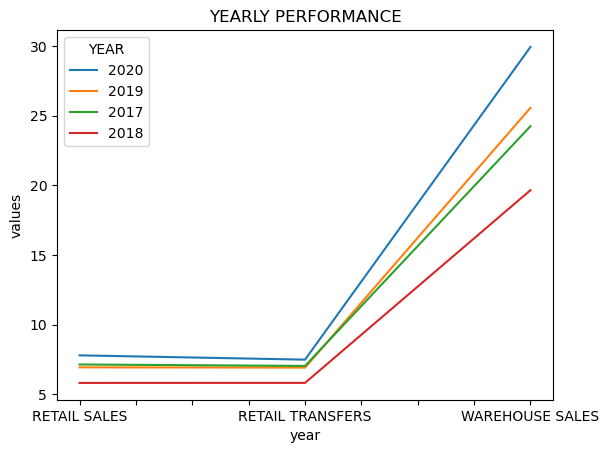

In [39]:
df_mean.plot()
plt.title('YEARLY PERFORMANCE')
plt.xlabel('year')
plt.ylabel('values')

Text(0, 0.5, 'values')

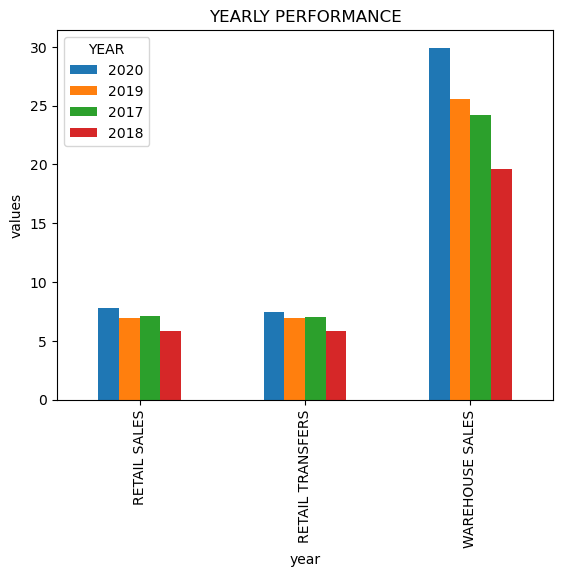

In [40]:
df_mean.plot(kind='bar')
plt.title('YEARLY PERFORMANCE')
plt.xlabel('year')
plt.ylabel('values')

In [47]:
df=np.log(df_mean+1)
df

,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
YEAR,,,
2020,2.173352,2.137643,3.431663
2019,2.070134,2.067739,3.279348
2017,2.095854,2.082853,3.228399
2018,1.918117,1.918434,3.027499


<Axes: >

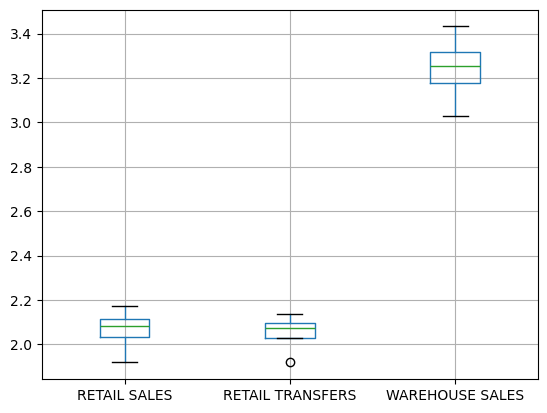

In [55]:
df.boxplot()

<Axes: >

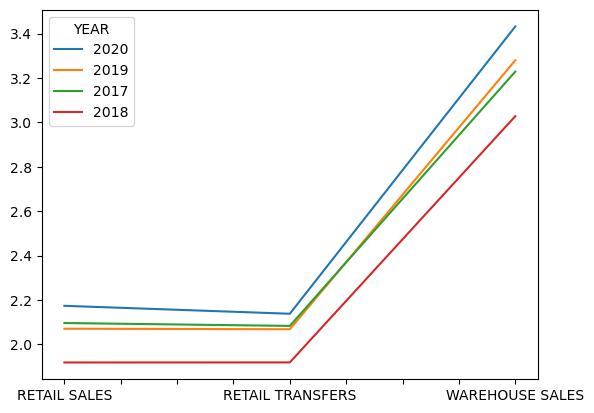

In [78]:
df=df.transpose()
df.plot()
#plt.title('YEARLY PERFORMANCE')
#plt.xlabel('year')
#plt.ylabel('values')

Text(0.5, 1.0, 'BREAKDOWN BY YEAR')

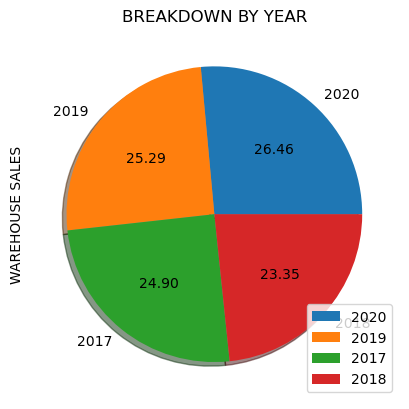

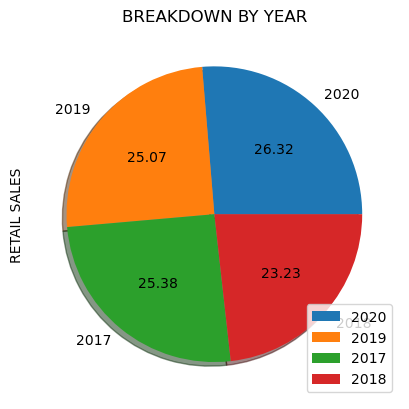

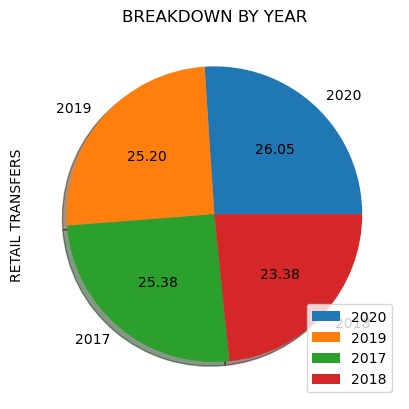

In [53]:
df.plot(kind = 'pie', y= 'WAREHOUSE SALES', autopct='%1.2f', shadow=True)
plt.title('BREAKDOWN BY YEAR')
df.plot(kind = 'pie', y= 'RETAIL SALES', autopct='%1.2f', shadow=True)
plt.title('BREAKDOWN BY YEAR')
df.plot(kind = 'pie', y= 'RETAIL TRANSFERS', autopct='%1.2f', shadow=True)
plt.title('BREAKDOWN BY YEAR')

Text(0, 0.5, 'values')

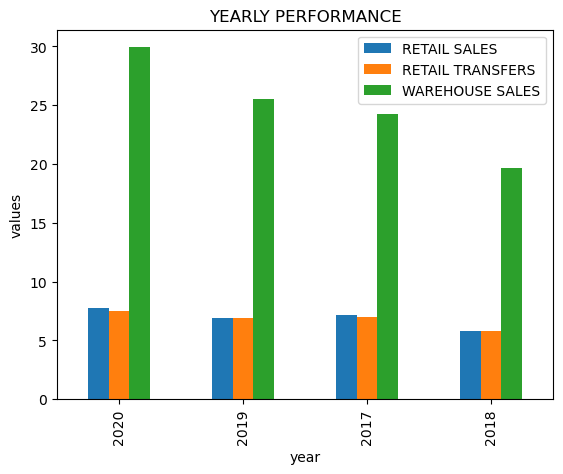

In [54]:
df_mean.plot(kind='bar')
plt.title('YEARLY PERFORMANCE')
plt.xlabel('year')
plt.ylabel('values')

Text(0.5, 1.0, 'HISTOGRAM')

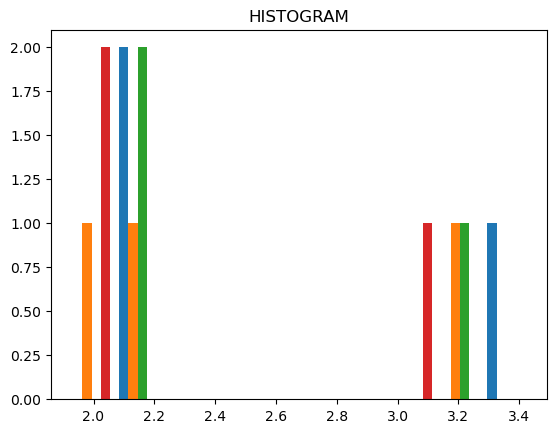

In [79]:
plt.hist(df)
plt.title('HISTOGRAM')